In [27]:
import numpy as np
import seaborn as sns
import pandas as pd

In [14]:
class minelr:
    def __init__(self):
        self.m = None
        self.b = None
    
    def fit(self,X_train,y_train):
        # y = mx+b
        #m=E(xi-x)(yi-y)*(yi-y)\
        #    E(xi-x)^2
        #where xi and yi are Observed Data Sets , x and y are Mean Value
        # b= y-(m*y)
        num = 0
        den = 0     
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den = den + ((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self,X_test):
        return self.m * X_test + self.b

In [15]:
df = pd.read_csv(r"C:\Users\Masood\Downloads\placement (1).csv")

In [16]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [17]:
# y_train.mean()-(0.5579519734250721*X_train.mean())

In [18]:
df.iloc[0,0]

6.89

In [19]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
X_train.shape

(160,)

In [22]:
lr = minelr()

In [23]:
lr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [24]:
X_test[0]

8.58

In [26]:
pred = lr.predict(X_test)

<Axes: >

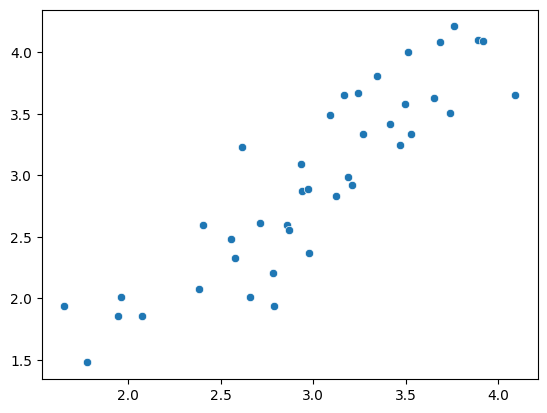

In [28]:
sns.scatterplot(x=pred,y=y_test)

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [30]:
print('mean_squared_error : ',mean_squared_error(y_test,pred))
print('mean_absolute_error : ',mean_absolute_error(y_test,pred))

mean_squared_error :  0.12129235313495523
mean_absolute_error :  0.2884710931878174


In [31]:
residuals = y_test-pred
residuals

array([ 0.20888399,  0.39675531, -0.30464568, -0.24434935,  0.2862714 ,
       -0.29647803, -0.21219258,  0.15856138,  0.44721294, -0.06701814,
       -0.44197872,  0.48829133, -0.08049525,  0.19861576, -0.19809652,
       -0.21707251, -0.08386362,  0.42610828, -0.60607477,  0.00314317,
       -0.07761079,  0.48422156, -0.25890486, -0.29114229,  0.39532622,
       -0.3100639 ,  0.08502989,  0.46567692,  0.17098639,  0.04939782,
       -0.02119666, -0.2904146 , -0.23046898, -0.8463711 , -0.57079158,
        0.06821068, -0.18844723,  0.61659401, -0.64804215, -0.10383735])

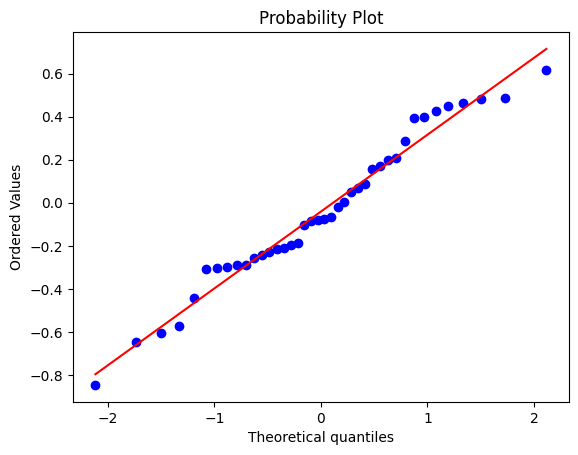

In [32]:
import pylab
import scipy.stats as stats

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()